In [4]:
import matplotlib.image as mpimg
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as pl
import scipy.stats as stats
from scipy import fft
from scipy.fftpack import fft,fft2, fftshift, ifft2, ifftshift
import image_tools
from scipy import signal

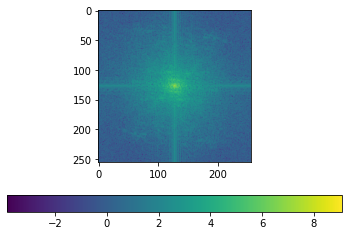

In [5]:
# Assignment 2a 

image = mpimg.imread("trui.png")
ftimage = scipy.fft.fft2(image)
ftimage = scipy.fft.fftshift(ftimage)
psd = np.log10(abs(ftimage)**2)
plt.imshow((psd))
plt.colorbar(orientation='horizontal')
plt.show()

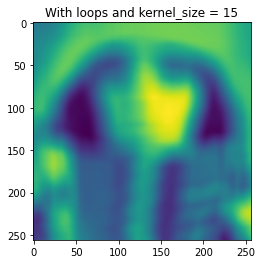

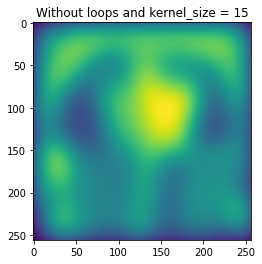

655 ms ± 41.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
14.3 ms ± 562 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
# Assignment 2b
image = mpimg.imread("trui.png")
#print(image)
#print(np.size(image[0:3, 0:0+3]))

def convolve_with_loops(data, kernel_size):
    nx, ny = data.shape
    convolved=np.zeros((nx, ny))
    actual_kernel_size = kernel_size
    for i in range(0, nx):
        for j in range(0, ny):
            # set kernel_size for 'outer' values
            if i < kernel_size:
                kernel_size_i = i % kernel_size
            if j < kernel_size:
                kernel_size_j = j % kernel_size
                
            # calculate new value to convolved
            sum_ = np.sum(image[i-kernel_size_i:i+kernel_size+1, j-kernel_size_j:j+kernel_size+1])
            size_ = np.size(image[i-kernel_size_i:i+kernel_size+1, j-kernel_size_j:j+kernel_size+1])
            convolved[i, j] = sum_ / size_
            
            # reset outer kernels for i and j
            kernel_size_i = kernel_size
            kernel_size_j = kernel_size

    return convolved
convolved = convolve_with_loops(image, 15)
#print(convolved)
imgplot = plt.imshow(convolved)
plt.title('With loops and kernel_size = 15')
plt.gray()
plt.show()
image = mpimg.imread("trui.png")
def convolve_without_loops(image, kernel_size):
    kernel = np.outer(signal.windows.gaussian(len(image[0]), kernel_size),
                  signal.windows.gaussian(len(image[0]), kernel_size))
    blurred = signal.fftconvolve(image, kernel, mode='same')
    return blurred
blurred = convolve_without_loops(image, 15)
imgplot = plt.imshow(blurred)
plt.title('Without loops and kernel_size = 15')
plt.gray()
plt.show()



%timeit convolved = convolve_with_loops(image, 15)
%timeit convolved_2 = convolve_without_loops(image, 15)